## Thông tin
- Họ và tên: Lê Nhựt Nam
- MSHV: 23C24004

## Import các thứ

In [107]:
# Function to check if a package is installed and install it if necessary
install_if_missing <- function(package) {
  if (!require(package, character.only = TRUE)) {
    install.packages(package)
    library(package, character.only = TRUE)
  }
}

# List of packages to check
packages <- c(
  "dplyr", "tidyr", "car", "MASS",
  "leaps", "Metrics", "lmtest", "ggplot2", "clusterSim", "jtools", "robustbase"
)

# Check and install each package
lapply(packages, install_if_missing)

library(dplyr)
library(tidyr)
library(car)
library(MASS)
library(leaps)
library(Metrics)
library(lmtest)
library(ggplot2)
library(clusterSim)
library(jtools)
library(robustbase)

Loading required package: robustbase

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘robustbase’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘DEoptimR’




[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
 [1] "robustbase" "jtools"     "clusterSim" "cluster"    "ggplot2"   
 [6] "lmtest"     "zoo"        "Metrics"    "leaps"      "MASS"      
[11] "car"        "carData"    "tidyr"      "dplyr"      "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"

## Đọc dữ liệu

In [2]:
# Đọc dữ liệu từ tập tin
raw_data = read.table("https://raw.githubusercontent.com/lnhutnam/datasets/main/insurance.csv", header=TRUE, sep=",", stringsAsFactors = FALSE)
str(raw_data)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


## Khám phá và tiền xử lý dữ liệu

### Dữ liệu có bao nhiều dòng và bao nhiêu cột?

In [3]:
# Kích thước của dữ liệu
# Ta thấy dữ liệu có 506 dòng và 14 cột
dim(raw_data)

[1] 1338    7

Ta thấy dữ liệu có 1338 quan trắc và 7 thuộc tính

### Mỗi dòng có ý nghĩa gì? Liệu có tồn tại dòng nào mà mang ý nghĩa khác với các dòng còn lại không?

Dựa trên thông tin của tập dữ liệu, ta thấy mỗi dòng mang ý nghĩa khác nhau, tức là mỗi quan trắc độc lập nhau.

### Dữ liệu có bị trùng lặp không?

Ta thấy dữ liệu không trùng lặp

In [4]:
# Kiểm tra dữ liệu trùng lặp
duplicates <- raw_data[duplicated(raw_data), ]
duplicate_counts <- table(raw_data[duplicated(raw_data), ])
duplicates # Không có dữ liệu trùng lặp

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
582,19,male,30.59,0,no,northwest,1639.563


### Mỗi cột mang ý nghĩa gì?

In [5]:
# Đầu tiên, ta xem xét một số quan trắc
str(raw_data)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


- **age**: tuổi của người hưởng phúc lợi chính
- **sex**: giới tính (nữ - female, nam - male)
- **bmi**: Chỉ số khối cơ thể, cung cấp sự hiểu biết về cơ thể, cân nặng tương đối cao hay thấp so với chiều cao, chỉ số khách quan về trọng lượng cơ thể (kg / m ^ 2) sử dụng tỷ lệ giữa chiều cao và cân nặng, lý tưởng nhất là 18,5 đến 24,9
- **children**: số lượng trẻ em
- **smoking**: có hút thuốc hay không? (yes - no)
- **region**: khu vực trong nước Mỹ (northeast, southeast, southwest, northwest)
- **charges**: chi phí y tế.

### Có cột nào có kiểu dữ liệu chưa phù hợp? Nếu có, cần chuyển đổi sang kiểu phù hợp

In [6]:
raw_data$children <- as.character(raw_data$children)

In [7]:
is.factor(raw_data$sex) # -> False

[1] FALSE

In [8]:
is.factor(raw_data$children) # -> False

[1] FALSE

In [9]:
is.factor(raw_data$region) # -> False

[1] FALSE

In [10]:
is.factor(raw_data$smoker) # -> False

[1] FALSE

In [11]:
processed_data <- raw_data
processed_data$sex <- as.factor(raw_data$sex)
processed_data$children <- as.factor(raw_data$children)
processed_data$region <- as.factor(raw_data$region)
processed_data$smoker <- as.factor(raw_data$smoker)

### Các cột với kiểu dữ liệu số phân bố như thế nào?

In [12]:
# Function to calculate missing ratio
missing_ratio <- function(s) {
  round(mean(is.na(s)) * 100, 1)
}

# Function to calculate median
median_custom <- function(df) {
  round(quantile(df, 0.5, na.rm = TRUE), 1)
}

# Function to calculate lower quartile
lower_quartile <- function(df) {
  round(quantile(df, 0.25, na.rm = TRUE), 1)
}

# Function to calculate upper quartile
upper_quartile <- function(df) {
  round(quantile(df, 0.75, na.rm = TRUE), 1)
}

In [13]:
# Select numerical columns
num_col_info_df <- as.data.frame(processed_data)  %>% select_if(is.numeric)

# Aggregating statistics
num_col_info_df <- num_col_info_df %>%
  reframe(
    missing_ratio = sapply(., missing_ratio),
    min = sapply(., min, na.rm = TRUE),
    lower_quartile = sapply(., lower_quartile),
    median = sapply(., median_custom),
    upper_quartile = sapply(., upper_quartile),
    max = sapply(., max, na.rm = TRUE)
  )

print(num_col_info_df)

  missing_ratio      min lower_quartile median upper_quartile      max
1             0   18.000           27.0   39.0           51.0    64.00
2             0   15.960           26.3   30.4           34.7    53.13
3             0 1121.874         4740.3 9382.0        16639.9 63770.43


Nhận xét:
- Các thuộc tính không có missing values
-

### Các cột với kiểu dữ liệu phân loại phân bố như thế nào?

In [14]:
# Function to calculate missing ratio
missing_ratio <- function(s) {
  round(mean(is.na(s)) * 100, 1)
}

# Function to calculate number of unique values
num_values <- function(s) {
  s <- strsplit(s, ";")
  s <- unlist(s)
  length(unique(s))
}

# Function to calculate value ratios
value_ratios <- function(s) {
  s <- strsplit(s, ";")
  s <- unlist(s)
  totalCount <- sum(!is.na(s))
  value_counts <- table(s)
  ratios <- round((value_counts / totalCount) * 100, 1)
  as.list(ratios)
}

In [15]:
# Select categorical columns (assuming character columns as categorical)
cat_col_info_df <-  as.data.frame(raw_data)  %>%
  select_if(is.character)

# Function to aggregate results for each column
aggregate_results <- function(df) {
  result <- data.frame(
    column = names(df),
    missing_ratio = sapply(df, missing_ratio),
    num_values = sapply(df, num_values),
    value_ratios = I(lapply(df, value_ratios))
  )
  result
}

# Apply the aggregation function
cat_col_info_df <- aggregate_results(cat_col_info_df)

# Print the result
print(cat_col_info_df)

           column missing_ratio num_values value_ratios
sex           sex             0          2   49.5, 50.5
children children             0          6 42.9, 24....
smoker     smoker             0          2   79.5, 20.5
region     region             0          4 24.2, 24....


In [16]:
print(cat_col_info_df["value_ratios"])

         value_ratios
sex        49.5, 50.5
children 42.9, 24....
smoker     79.5, 20.5
region   24.2, 24....


Kiểm tra lại với hàm summary của R

In [17]:
summary(processed_data)

      age            sex           bmi        children smoker    
 Min.   :18.00   female:662   Min.   :15.96   0:574    no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1:324    yes: 274  
 Median :39.00                Median :30.40   2:240              
 Mean   :39.21                Mean   :30.66   3:157              
 3rd Qu.:51.00                3rd Qu.:34.69   4: 25              
 Max.   :64.00                Max.   :53.13   5: 18              
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

### Kiểm tra tương quan trong dữ liệu

In [18]:
num_col_info_df <- as.data.frame(processed_data)  %>% select_if(is.numeric)
round(cor(num_col_info_df), 2)

,age,bmi,charges
age,1.00,0.11,0.3
bmi,0.11,1.00,0.2
charges,0.30,0.20,1.0


Nhân xét:
- Ta thấy

## Phân tích ảnh hưởng của các biến với chi phí y tế

### Phân tích biến phụ thuộc (charges)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


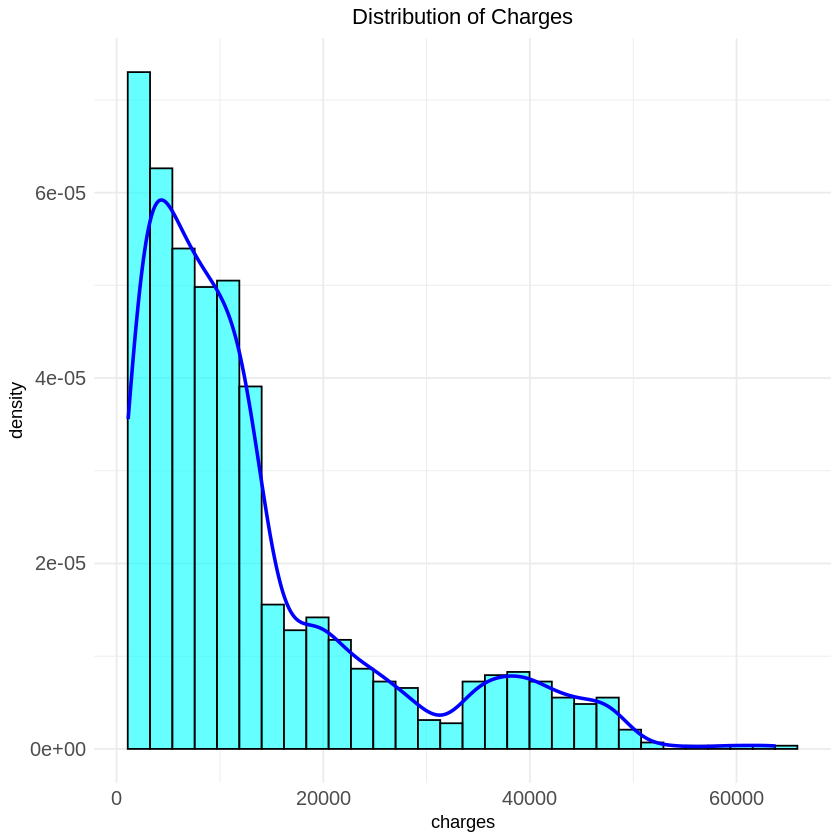

In [19]:
ggplot(processed_data, aes(x = charges)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "cyan", color = "black", alpha = 0.6) +
  geom_density(color = "blue", size = 1) +
  theme_minimal() +
  ggtitle("Distribution of Charges") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(size = 12),  # Increase font size for x-axis labels
    axis.text.y = element_text(size = 12)   # Increase font size for y-axis labels
  )

Nhận xét:
- Ta thấy phân phối bị lệch trái. Để làm nó chuẩn hơn, ta có thể sử dụng log-scale.

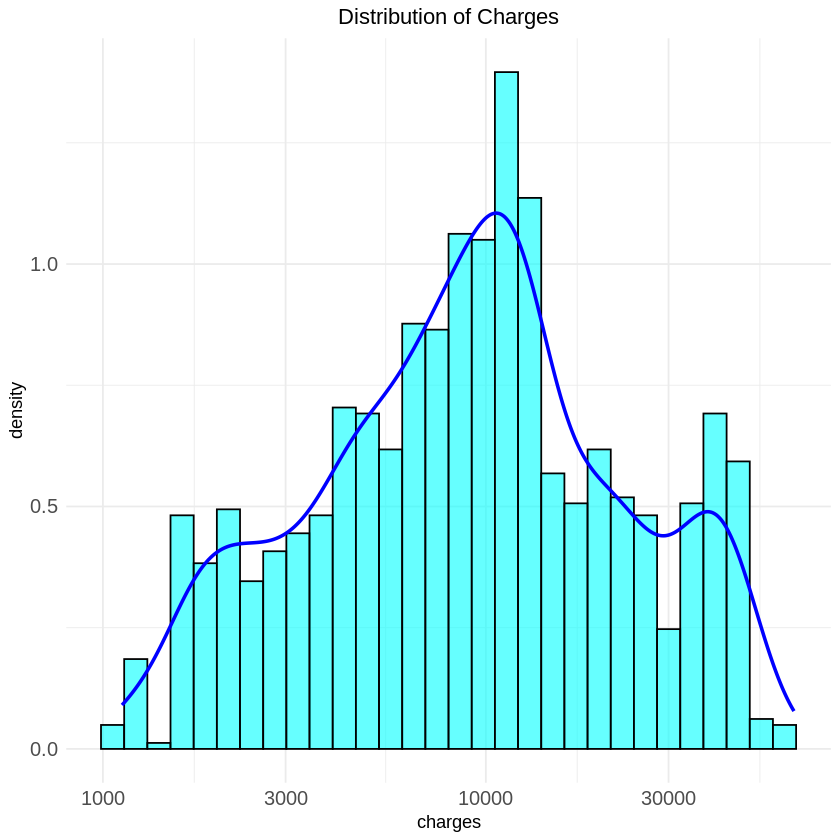

In [20]:
ggplot(processed_data, aes(x = charges)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "cyan", color = "black", alpha = 0.6) +
  geom_density(color = "blue", size = 1) +
  scale_x_log10() +  # Apply log scale to the x-axis
  theme_minimal() +
  ggtitle("Distribution of Charges") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(size = 12),  # Increase font size for x-axis labels
    axis.text.y = element_text(size = 12)   # Increase font size for y-axis labels
  )

### Ước lượng ý nghĩa của các tác động chính đến chi phí y tế

In [21]:
str(processed_data)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: Factor w/ 6 levels "0","1","2","3",..: 1 2 4 1 1 1 2 4 3 1 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


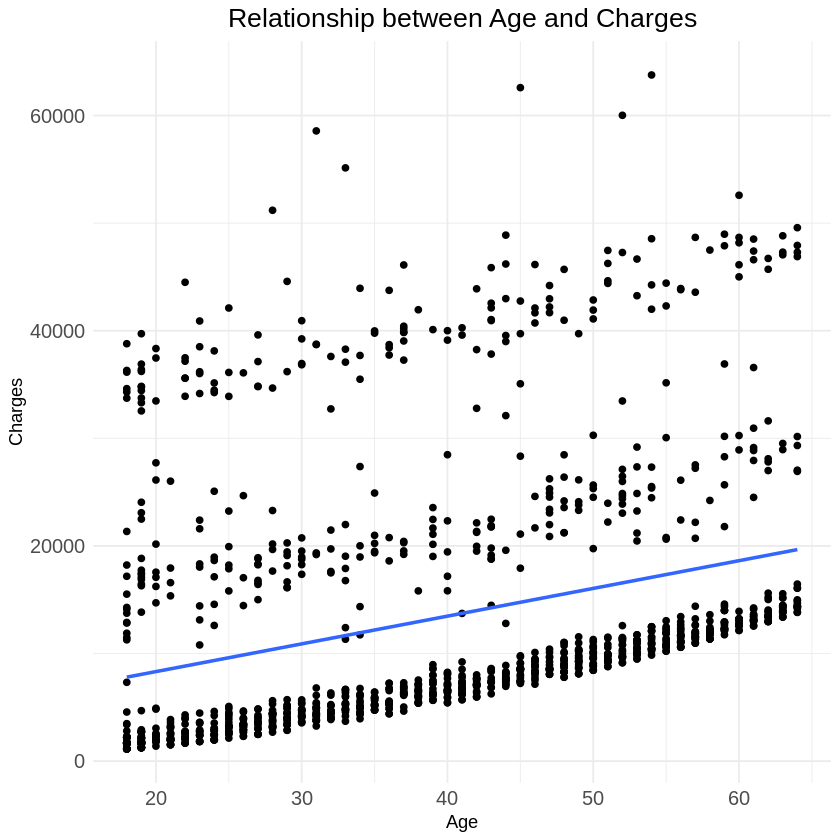

In [22]:
ggplot(processed_data, aes(x = age, y = charges)) +
  geom_point() +  # Scatter plot
  geom_smooth(method = "lm", formula = 'y ~ x', se = FALSE) +  # Add linear regression line
  labs(title = "Relationship between Age and Charges",
       x = "Age",
       y = "Charges") +  # Legend title
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_blank()  # Remove legend text
  )

Nhận xét:
- Ta thấy quan hệ giữa Age và Charges là tuyến tính. Điều này có nghĩa là tuổi càng cao thì chi phí y tế cũng càng cao.

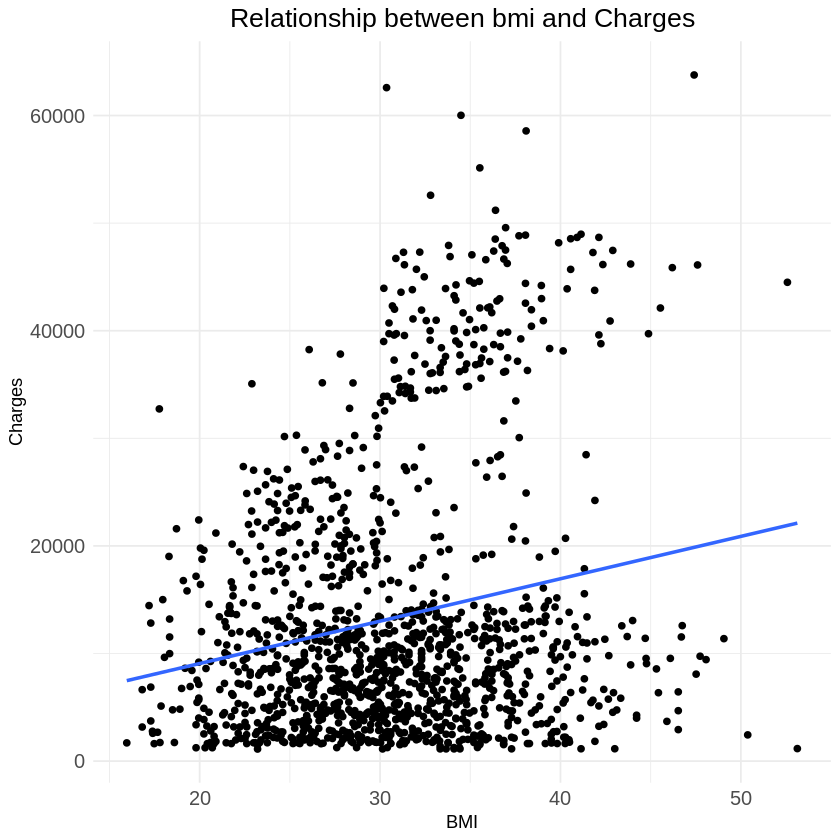

In [23]:
ggplot(processed_data, aes(x = bmi, y = charges)) +
  geom_point() +  # Scatter plot
  geom_smooth(method = "lm", formula = 'y ~ x', se = FALSE) +  # Add linear regression line
  labs(title = "Relationship between bmi and Charges",
       x = "BMI",
       y = "Charges") +  # Legend title
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_blank()  # Remove legend text
  )

Nhận xét:
- Ta nhận thấy giữa BMI và Charge không có mối quan hệ tuyến tính.
- Ta cần khảo sát thêm nhân tố khác ảnh hưởng đến BMI.

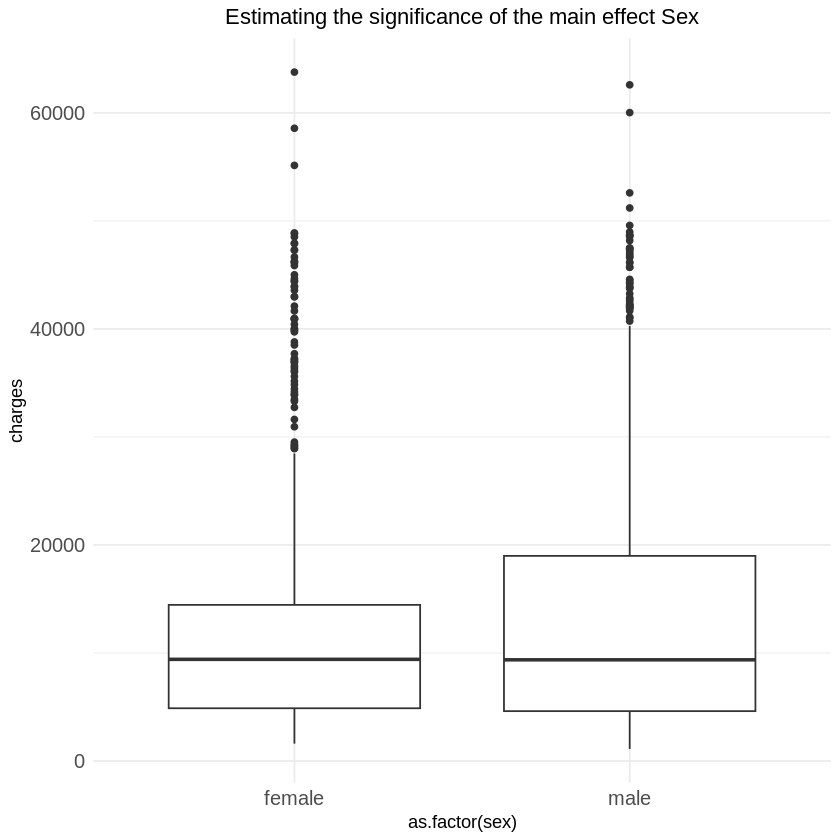

In [24]:
ggplot(processed_data, aes(x=as.factor(sex), y=charges)) + geom_boxplot() + theme_minimal() +
  ggtitle("Estimating the significance of the main effect Sex") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(size = 12),  # Increase font size for x-axis labels
    axis.text.y = element_text(size = 12)   # Increase font size for y-axis labels
  )

Nhận xét:
- Ta thấy trung bình Charge đối với nữ giới bằng trung bình Charge đối với nam giới
- Điều này cho thấy, không có sự khác biệt đáng kể giữa hai loại giới tính này (trên bề mặt toàn cục).

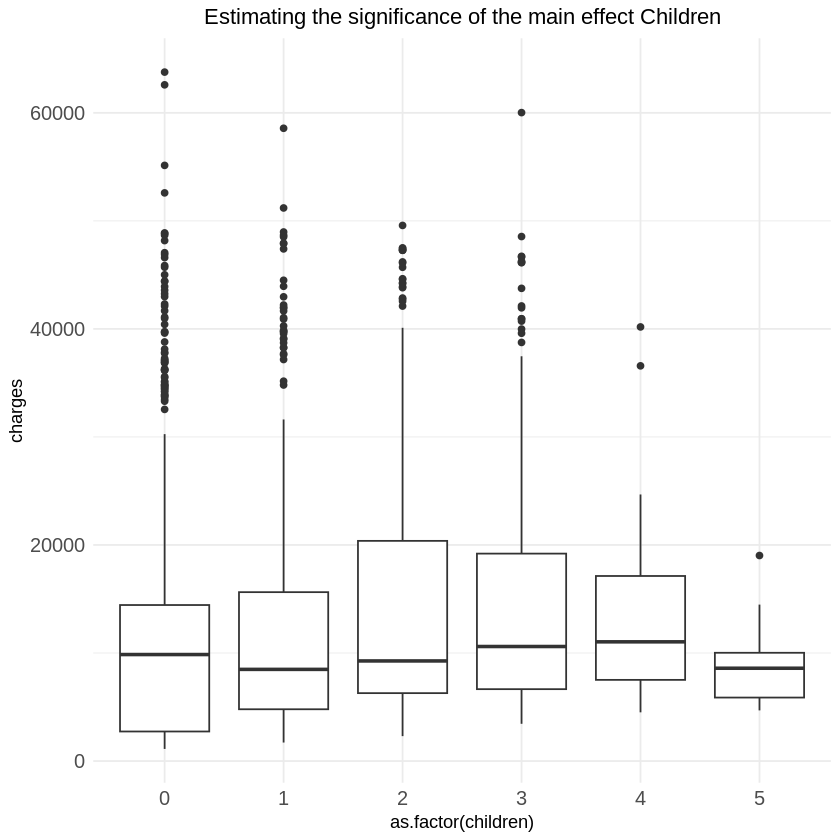

In [25]:
ggplot(processed_data, aes(x=as.factor(children), y=charges)) + geom_boxplot() + theme_minimal() +
  ggtitle("Estimating the significance of the main effect Children") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(size = 12),  # Increase font size for x-axis labels
    axis.text.y = element_text(size = 12)   # Increase font size for y-axis labels
  )

Nhận xét:
- Ta thấy trung bình số lượng trẻ 0, 1, 2, 3, 4, và 5 là khác nhau.
- Điều này cho thấy rằng ít nhất một trong các trung bình charge của số lượng trẻ khác biệt đáng kể so với các trung bình khác.

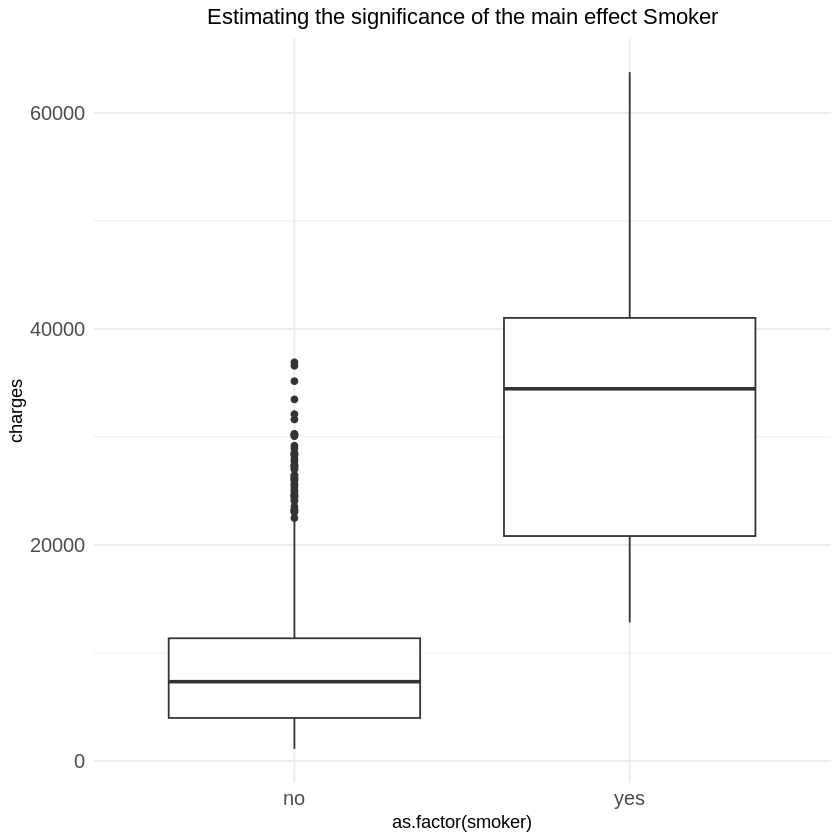

In [26]:
ggplot(processed_data, aes(x=as.factor(smoker), y=charges)) + geom_boxplot() + theme_minimal() +
  ggtitle("Estimating the significance of the main effect Smoker") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(size = 12),  # Increase font size for x-axis labels
    axis.text.y = element_text(size = 12)   # Increase font size for y-axis labels
  )

Nhận xét:
- Ta thấy trung bình charge của người có hút thuốc và không hút thuốc khác nhau.

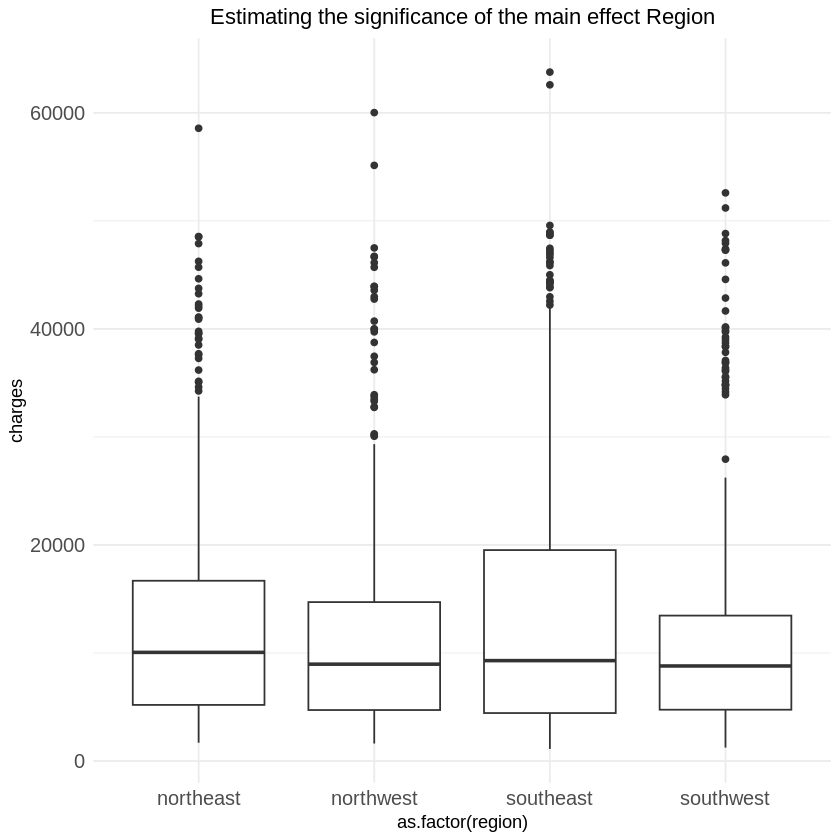

In [27]:
ggplot(processed_data, aes(x=as.factor(region), y=charges)) + geom_boxplot() + theme_minimal() +
  ggtitle("Estimating the significance of the main effect Region") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(size = 12),  # Increase font size for x-axis labels
    axis.text.y = element_text(size = 12)   # Increase font size for y-axis labels
  )

Nhận xét:
- Ta nhận thấy trung bình charge ở các vùng không có cách biệt đáng kể.

### Phân tích chi phí trên từng vùng



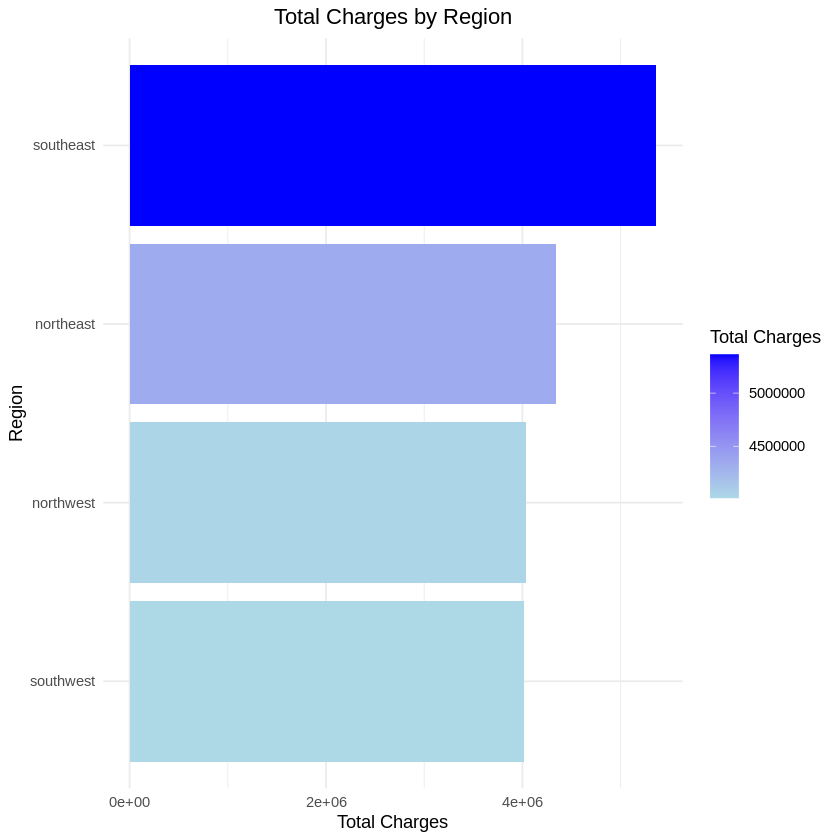

In [28]:
charges <- processed_data %>%
  group_by(region) %>%
  summarise(total_charges = sum(charges)) %>%
  arrange(total_charges) %>%
  head()

# Create the bar plot with color density reflecting the amount of charges
ggplot(charges, aes(x = reorder(region, total_charges), y = total_charges, fill = total_charges)) +
  geom_bar(stat = "identity") +
  coord_flip() +  # Flip coordinates to match horizontal bars
  theme_minimal() +
  scale_fill_gradient(low = "lightblue", high = "blue") +  # Gradient color scale
  labs(title = "Total Charges by Region",
       x = "Region",
       y = "Total Charges",
       fill = "Total Charges") +  # Legend title
  theme(plot.title = element_text(hjust = 0.5))

Nhận xét:
- Chi phí y tế ở vùng southeast cao nhất
- Ở vùng southwest có chi phi y tế thấp nhất

Đánh giá yếu tố giới tính ảnh hưởng đến chi phí y tế của từng vùng

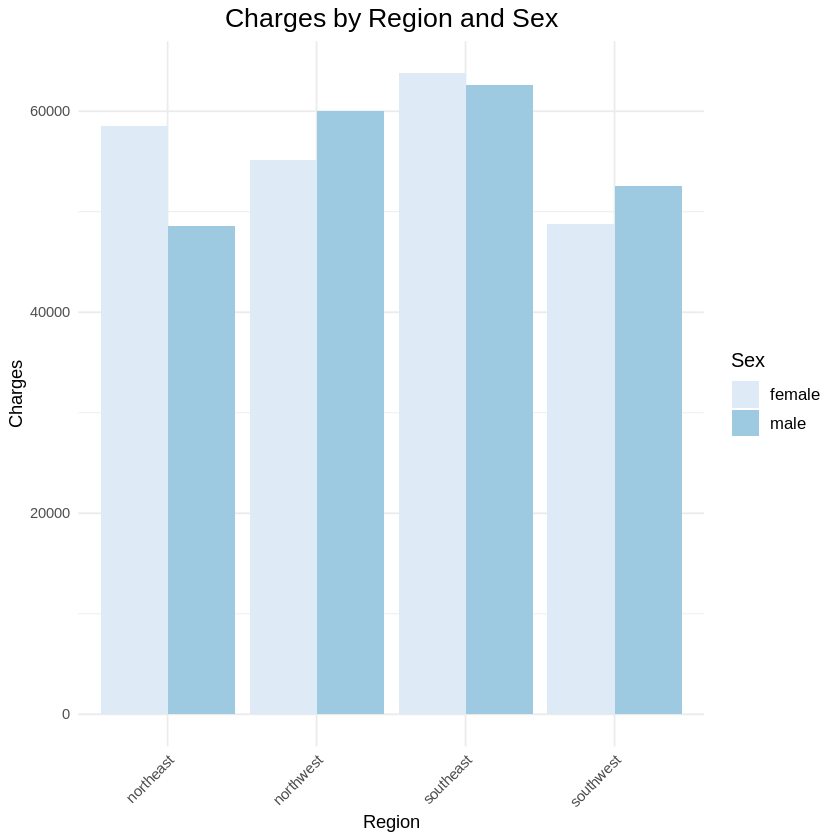

In [29]:
ggplot(processed_data, aes(x = region, y = charges, fill = sex)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  scale_fill_brewer(palette = "Blues") +
  labs(title = "Charges by Region and Sex",
       x = "Region",
       y = "Charges",
       fill = "Sex") +  # Legend title
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels for better readability
    plot.title = element_text(size = 16),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

Nhận xét:
- Đối với vùng southeast, nam giới có chi phí y tế thấp hơn nữ giới, nhưng chênh lệch này không đáng kể.
- Đối với vùng southwest, nam giới có chi phí y tế cao hơn nữ giới, chênh lệch này đáng kể so với chênh lệch ở vùng southeast.
- Vùng northeast có sự chênh lệch chi phí y tế giữa nam và nữ cao nhất.

Đánh giá yếu tố hút thuốc ảnh hưởng đến chi phí y tế của từng vùng

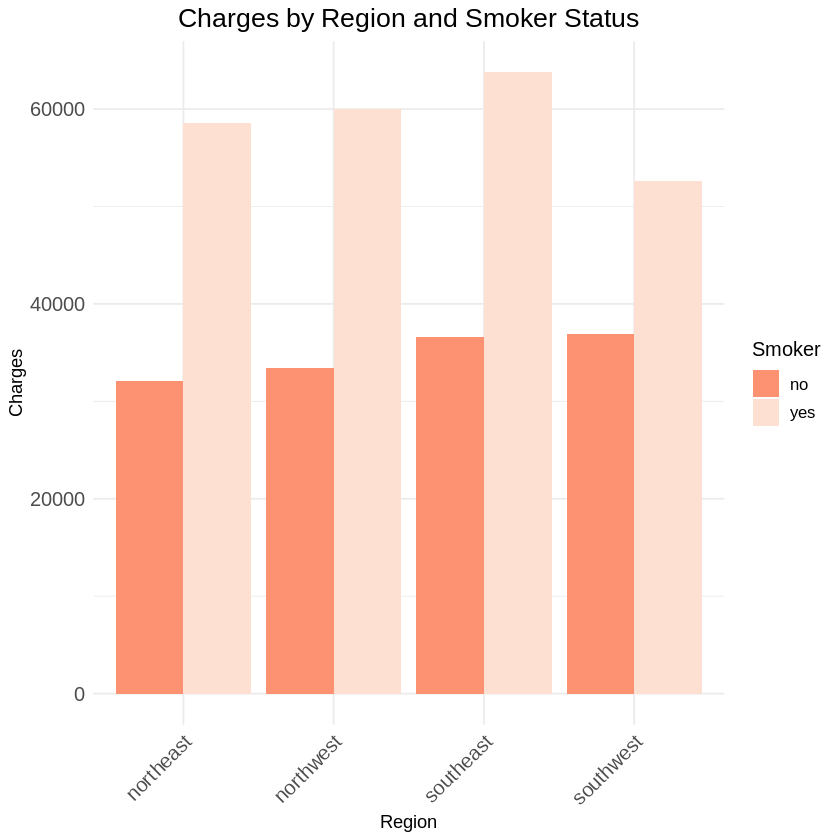

In [30]:
ggplot(processed_data, aes(x = region, y = charges, fill = smoker)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  scale_fill_brewer(palette = "Reds", direction = -1) +  # Reverse the Reds palette
  labs(title = "Charges by Region and Smoker Status",
       x = "Region",
       y = "Charges",
       fill = "Smoker") +  # Legend title
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),  # Rotate x-axis labels for better readability
    axis.text.y = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

Nhận xét:
- Yếu tố hút thuốc ảnh hưởng mạnh đến chi phí y tế ở tất cả các vùng.
- Vùng southeast, chi phí y tế khi có hút thuốc nhiều hơn các vùng còn lại.

Đánh giá yếu tố số lượng trẻ em ảnh hưởng đến chi phí y tế của từng vùng

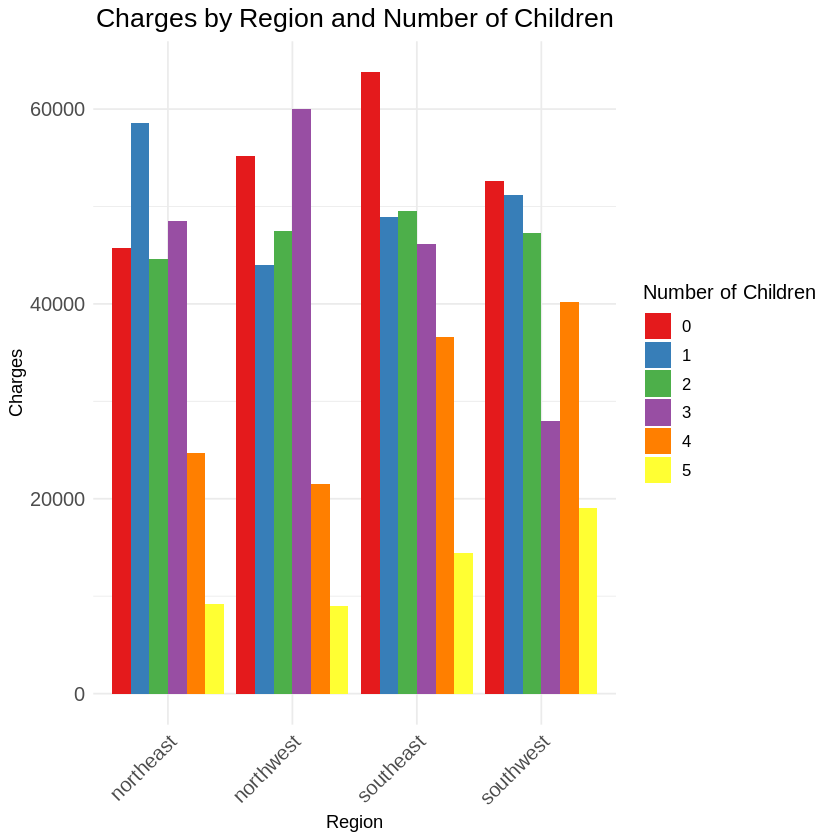

In [31]:
ggplot(processed_data, aes(x = region, y = charges, fill = factor(children))) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1") +  # Use the Set1 palette
  labs(title = "Charges by Region and Number of Children",
       x = "Region",
       y = "Charges",
       fill = "Number of Children") +  # Legend title
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),  # Rotate x-axis labels for better readability
    axis.text.y = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

Nhận xét:
- Những nhà không có trẻ em, chi phí y tế thường cao hơn ở các vùng southeast và southwest.
- Ở vùng northwest, chi phí ở các nhà có 3 trẻ cao nhất.
- Ở vùng northeast, những gia đình có trẻ em thì có chi phí y tế thường cao.

### Phân tích chi phí y tế bởi độ tuổi dựa trên nhân tố hút thuốc

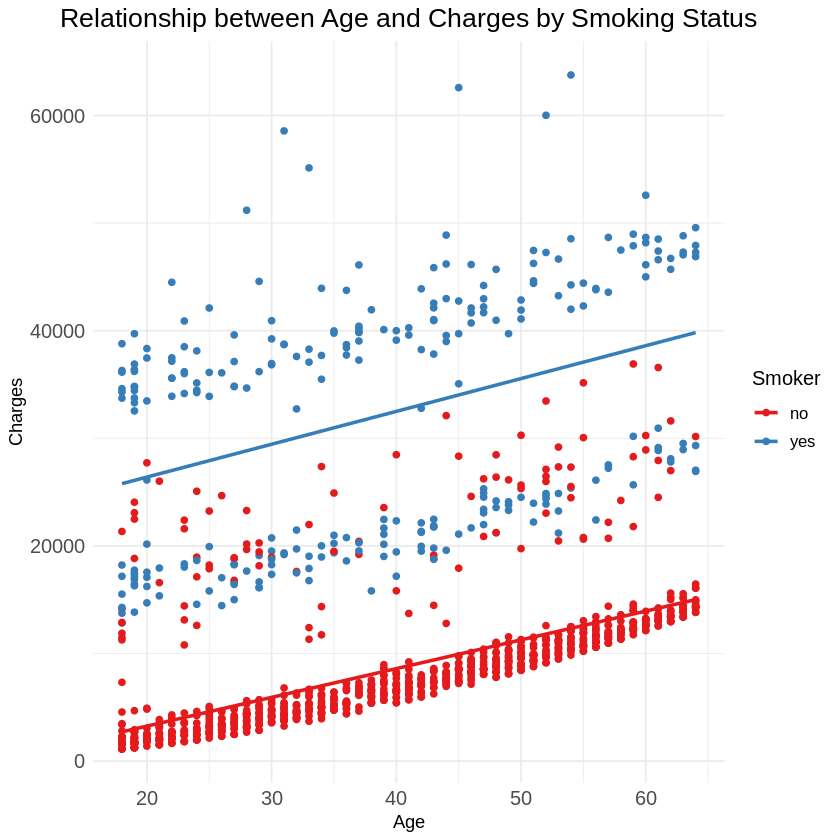

In [32]:
ggplot(processed_data, aes(x = age, y = charges, color = smoker)) +
  geom_point() +  # Scatter plot
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +  # Add linear regression line
  scale_color_brewer(palette = "Set1") +  # Color palette for smokers
  labs(title = "Relationship between Age and Charges by Smoking Status",
       x = "Age",
       y = "Charges",
       color = "Smoker") +  # Legend title
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

Nhận xét:
- Trong cả hai trường hợp có và không hút thuốc, đường tuyến tính giữa Age và chi phí y tế cùng hướng. Có nghĩa là, yếu tố có hút thuốc hay không "ít" ảnh hưởng đến mối quan hệ giữa độ tuổi và chi phí y tế.

### Phân tích chi phí y tế bởi BMI dựa trên nhân tố hút thuốc

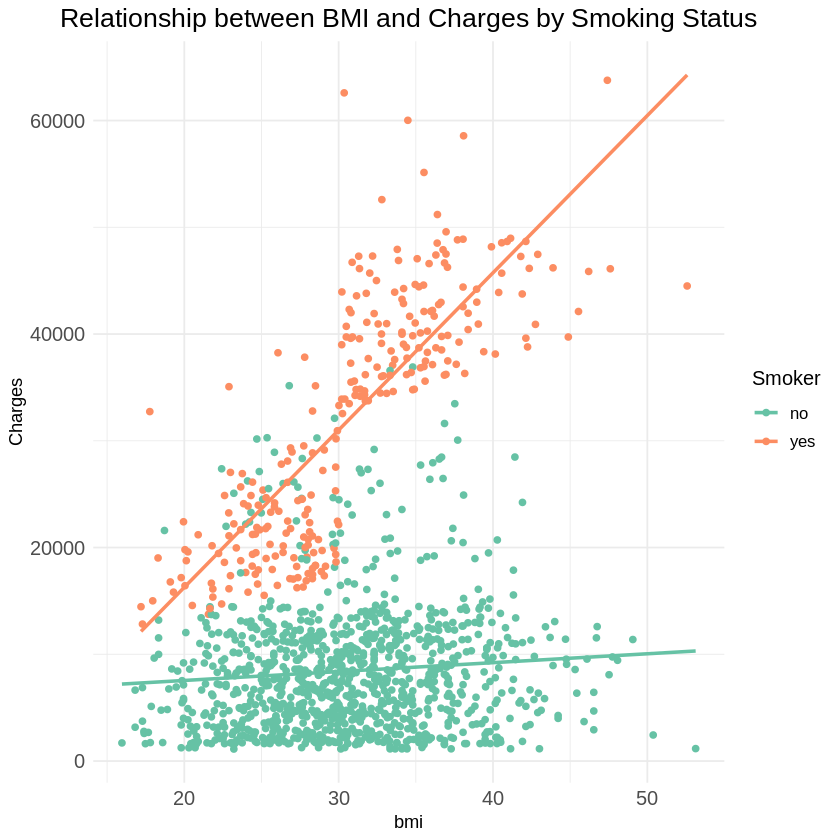

In [33]:
ggplot(processed_data, aes(x = bmi, y = charges, color = smoker)) +
  geom_point() +  # Scatter plot
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +  # Add linear regression line
  scale_color_brewer(palette = "Set2") +  # Color palette for smokers
  labs(title = "Relationship between BMI and Charges by Smoking Status",
       x = "bmi",
       y = "Charges",
       color = "Smoker") +  # Legend title
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

Nhận xét:
- Trong trường hợp có hút thuốc, đường tuyến tính giữa BMI và chi phí y tế có hệ số góc lớn.
- Trong trường hợp không hút thuốc, đường tuyến tính giữa BMI và chi phí y tế có hệ số góc nhỏ.

### Phân tích chi phí y tế bởi số lượng trẻ em dựa trên nhân tố hút thuốc

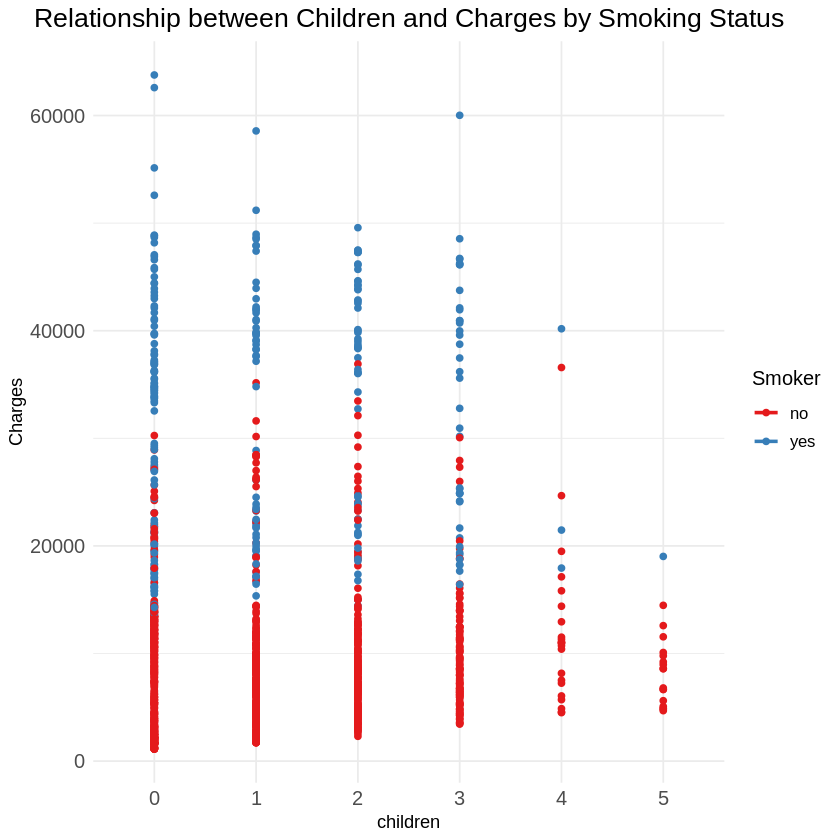

In [34]:
ggplot(processed_data, aes(x = children, y = charges, color = smoker)) +
  geom_point() +  # Scatter plot
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +  # Add linear regression line
  scale_color_brewer(palette = "Set1") +  # Color palette for smokers
  labs(title = "Relationship between Children and Charges by Smoking Status",
       x = "children",
       y = "Charges",
       color = "Smoker") +  # Legend title
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  )

## Phân tích nhân tố

### Xem xét nhóm nhân tố sex và smoker

- Khảo sát sự ảnh hưởng của việc hút thuốc và giới tính đối với chi phí y tế
  - Biến phản hồi: `charges`
  - Biến nhân tố: `sex`
  - Biến nhân tố: `smoker`

In [71]:
anova_data = processed_data[c("sex", "smoker", "charges")]
str(anova_data)
dim(anova_data)

'data.frame':	1338 obs. of  3 variables:
 $ sex    : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ smoker : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ charges: num  16885 1726 4449 21984 3867 ...


[1] 1338    3

Tạo bảng ANOVA

In [74]:
# Tao bảng ANOVA
charges_aov = aov(charges~., data = anova_data)
summary(charges_aov)

              Df    Sum Sq   Mean Sq F value   Pr(>F)    
sex            1 6.436e+08 6.436e+08   11.53 0.000707 ***
smoker         1 1.209e+11 1.209e+11 2164.53  < 2e-16 ***
Residuals   1335 7.455e+10 5.584e+07                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Kiểm tra tính chuẩn

```
H0: Dữ liệu có phân bố chuẩn - homogeneity (variances are equal across all samples)
H1: Dữ liệu có phân bố không chuẩn - heterogeneity (variances are not equal for at least one pair)
```

In [75]:
leveneTest(charges ~ smoker*sex, data = processed_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,99.63568,3.397331e-58
,1334,NA,NA


Nhận xét:
- P-value nhỏ hơn 0.05, do đó ta đủ cơ sở để bác bỏ giả thiết H0, tức là dữ liệu có phân bố không chuẩn.

Trực quan hóa tương tác

Ta sử dụng biểu đồ tương tác để kiểm tra liệu có tương tác giữa hai biến này hay không. Nếu hai đường song song thì đây là mô hình cộng. Thật vậy, nhìn vào hai hình, hai biến này dường như có tương tác.

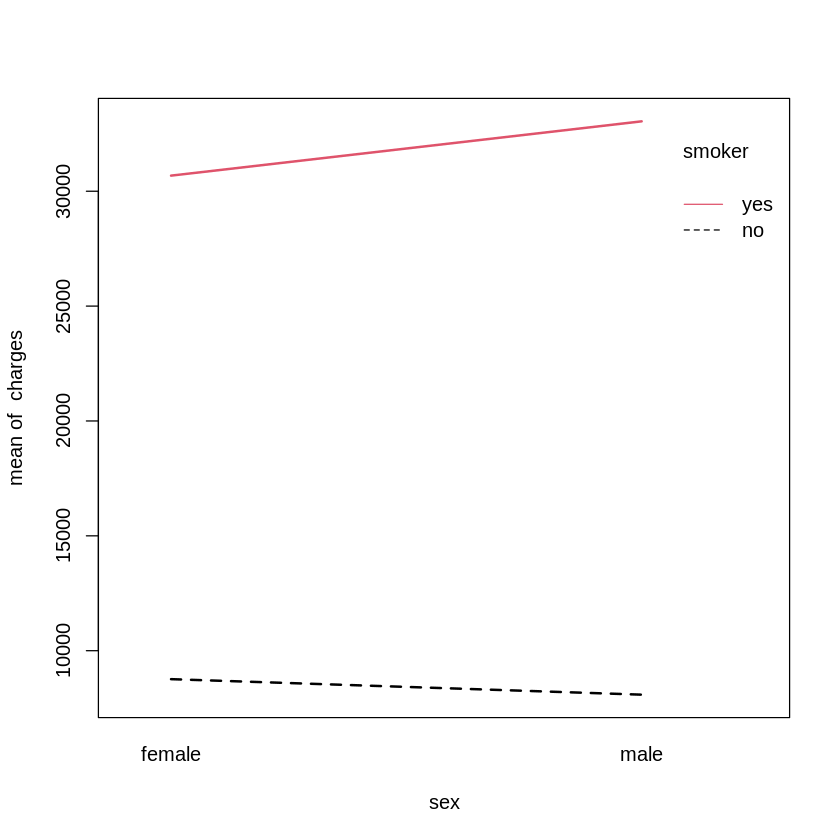

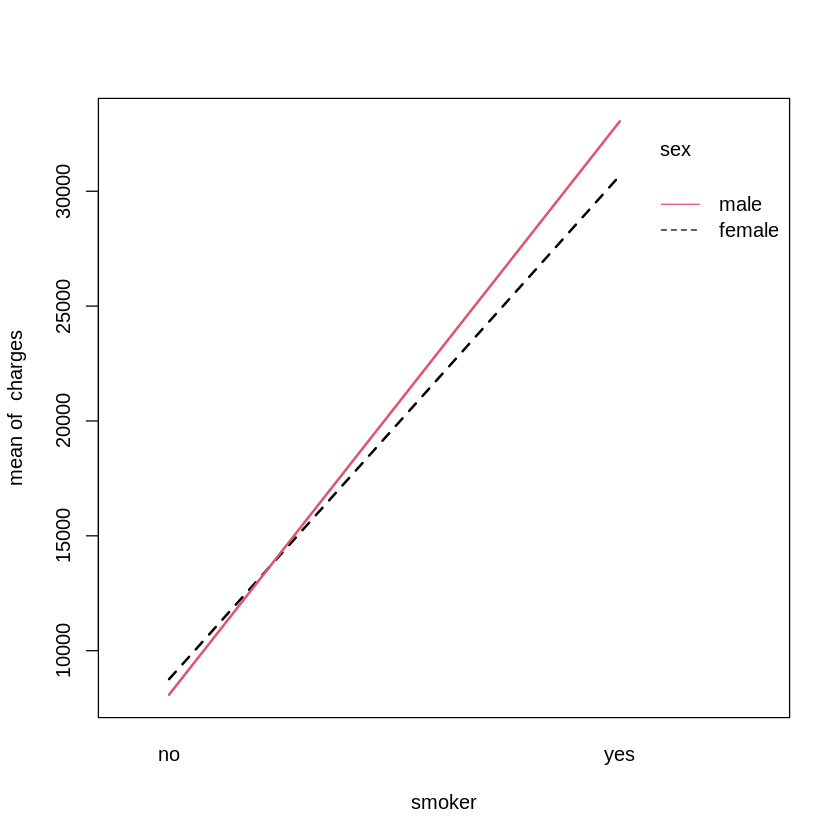

In [37]:
with(processed_data, interaction.plot(sex, smoker, charges, lwd = 2, col = 1:4))
with(processed_data, interaction.plot(smoker, sex, charges, lwd = 2, col = 1:3))

Ta khởi tạo tất cả các mô hình có thể có.

In [38]:
insurance_int   = aov(charges ~ smoker * sex, data = processed_data) # interaction model
insurance_add   = aov(charges ~ smoker + sex, data = processed_data) # additive model
insurance_smoker  = aov(charges ~ smoker , data = processed_data)        # single factor model
insurance_sex = aov(charges ~ sex, data = processed_data)          # single factor model
insurance_null  = aov(charges ~ 1, data = processed_data)              # null model

In [39]:
print(summary(insurance_int))

              Df    Sum Sq   Mean Sq  F value  Pr(>F)    
smoker         1 1.215e+11 1.215e+11 2188.851 < 2e-16 ***
sex            1 1.421e+06 1.421e+06    0.026 0.87290    
smoker:sex     1 4.923e+08 4.923e+08    8.868 0.00295 ** 
Residuals   1334 7.406e+10 5.552e+07                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Ta xem các giá trị ước lượng từ các mô hình

In [40]:
insurance_table = expand.grid(sex = unique(processed_data$sex), smoker = unique(processed_data$smoker))
insurance_table

sex,smoker
<fct>,<fct>
female,yes
male,yes
female,no
male,no


In [41]:
matrix(paste0(insurance_table$sex, "-", insurance_table$smoker) , 2, 2, byrow = TRUE)

female-yes,male-yes
female-no,male-no


In [42]:
get_est_means = function(model, table) {
  mat = matrix(predict(model, table), nrow = 2, ncol = 2, byrow = TRUE)
  colnames(mat) = c("Female", "Male")
  rownames(mat) = c("Yes", "No")
  mat
}

In [43]:
knitr::kable(get_est_means(model = insurance_int, table = insurance_table))



|    |    Female|      Male|
|:---|---------:|---------:|
|Yes | 30678.996| 33042.006|
|No  |  8762.297|  8087.205|

In [44]:
knitr::kable(get_est_means(model = insurance_add, table = insurance_table))



|    |    Female|      Male|
|:---|---------:|---------:|
|Yes | 32088.170| 32022.792|
|No  |  8466.036|  8400.657|

In [45]:
additive_means = get_est_means(model = insurance_add, table = insurance_table)
additive_means["Yes",] - additive_means["No",]

Female     Male 
23622.13 23622.13

In [46]:
additive_means = get_est_means(model = insurance_int, table = insurance_table)
additive_means["Yes",] - additive_means["No",]

Female    Male 
21916.7 24954.8

In [47]:
knitr::kable(get_est_means(model = insurance_sex, table = insurance_table))



|    |   Female|     Male|
|:---|--------:|--------:|
|Yes | 12569.58| 13956.75|
|No  | 12569.58| 13956.75|

In [48]:
knitr::kable(get_est_means(model = insurance_smoker, table = insurance_table))



|    |    Female|      Male|
|:---|---------:|---------:|
|Yes | 32050.232| 32050.232|
|No  |  8434.268|  8434.268|

In [49]:
knitr::kable(get_est_means(model = insurance_null, table = insurance_table))



|    |   Female|     Male|
|:---|--------:|--------:|
|Yes | 13270.42| 13270.42|
|No  | 13270.42| 13270.42|

In [50]:
summary(aov(charges ~ sex * smoker, data = processed_data))

              Df    Sum Sq   Mean Sq  F value   Pr(>F)    
sex            1 6.436e+08 6.436e+08   11.593 0.000682 ***
smoker         1 1.209e+11 1.209e+11 2177.284  < 2e-16 ***
sex:smoker     1 4.923e+08 4.923e+08    8.868 0.002954 ** 
Residuals   1334 7.406e+10 5.552e+07                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Dòng sex:smoker

```
H0: Tất cả các delta_j = 0 (tức là không có tương tác)
H1: Không phải tắt cả delta_j = 0 (tức là có tương tác)
```

Ta thấy p-value = 0.002954 < 0.05, ta đủ cơ sở để bác bỏ H0, tức là không phải tất cả delta_j = 0, vậy có tương tác giữa hai biến đang xem xét.

Dòng sex:
```
H0: Các hệ số của nhân tố sex = 0
H0: Không phải tất các hệ số của nhân tố sex = 0
```

Ta thấy p-value = 0.000682 < 0.05, ta đủ cơ sở bác bỏ H0, tức là không phải tất các hệ số của nhân tố sex = 0.

Tương tự, dòng smoker:
```
H0: Các hệ số của nhân tố smoker = 0
H0: Không phải tất các hệ số của nhân tố smoker = 0
```

Ta thấy p-value = 0.000682 < 0.05, ta đủ cơ sở bác bỏ H0, tức là không phải tất các hệ số của nhân tố smoker = 0.

Như vậy, ta thấy mô hình tương tác không có ý nghĩa với mức ý nghĩa 5%, nên ta chọn mô hình cộng.

#### Xem xét mô hình charges ~ sex

In [76]:
processed_aov_sex = aov(charges ~ sex, data = processed_data)
summary(processed_aov_sex)

              Df    Sum Sq   Mean Sq F value Pr(>F)  
sex            1 6.436e+08 643590180     4.4 0.0361 *
Residuals   1336 1.954e+11 146280413                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [77]:
##Tukey’s Honest Significance difference
TukeyHSD(processed_aov_sex, conf.level = 0.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = charges ~ sex, data = processed_data)

$sex
                diff      lwr      upr     p adj
male-female 1387.172 89.81229 2684.532 0.0361327


Nhận xét:
- Có sự khác nhau giữa chi phí y tế trung bình với giới nữ và nam, bởi vì p-value < 0.05, ta đủ cơ sở bác bỏ H0 (không có sự khác nhau giữa chi phí y tế trung bình giữa giới nữ và nam)

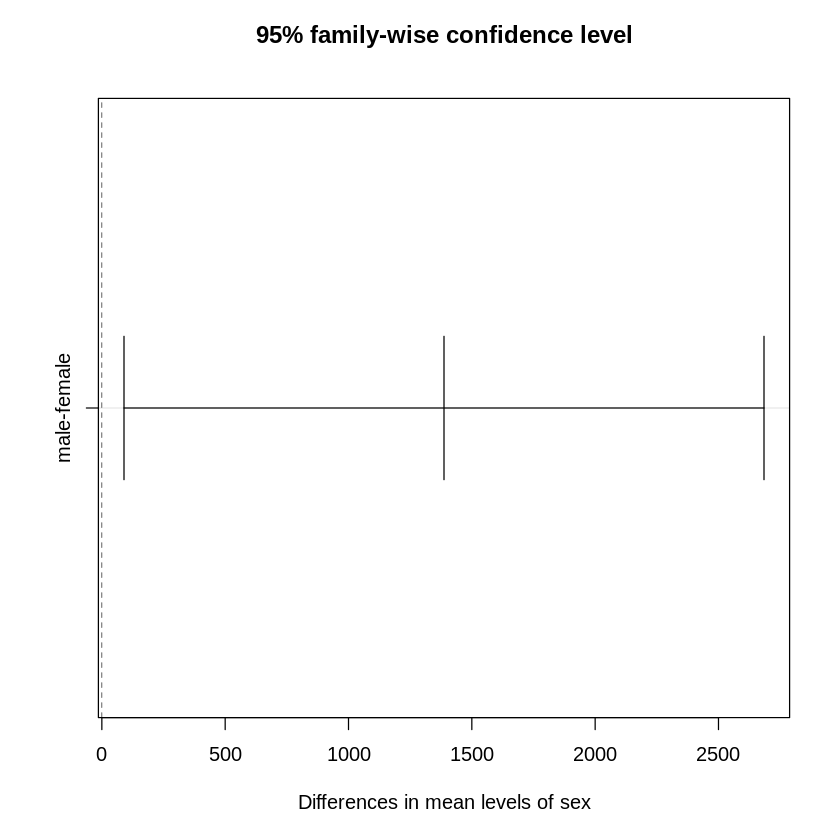

In [78]:
# produce a plot of these confidence intervals
plot(TukeyHSD(processed_aov_sex, conf.level = 0.95))

In [79]:
# Kiểm định shapiro
# - H0: Biến thặng dư của mô hình phân phối chuẩn
# - H1: Biến thặng dư của mô hình không phân phối
shapiro.test(residuals(processed_aov_sex))

# Nhìn vào kết quả có p-value < 0.05 nên ta đủ điều kiện bác bỏ H0, vậy thặng dư không tuân theo phân phối chuẩn


	Shapiro-Wilk normality test

data:  residuals(processed_aov_sex)
W = 0.82324, p-value < 2.2e-16


In [80]:
# install.packages("lmtest")

# Kiểm định Breusch-Pagan
# - H0: phương sai không đổi
# - H1: phương sai thay đổi
library(lmtest)
bptest(processed_aov_smoker)

# Với giá trị p-value < 0.05, ta đủ không đủ điều kiện bác bỏ H0. Vậy phương sai thay đổi


	studentized Breusch-Pagan test

data:  processed_aov_smoker
BP = 199.4, df = 1, p-value < 2.2e-16


#### Xem xét mô hình charges ~ smoker

In [52]:
processed_aov_smoker = aov(charges ~ smoker, data = processed_data)
summary(processed_aov_smoker)

              Df    Sum Sq   Mean Sq F value Pr(>F)    
smoker         1 1.215e+11 1.215e+11    2178 <2e-16 ***
Residuals   1336 7.455e+10 5.580e+07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [53]:
##Tukey’s Honest Significance difference
TukeyHSD(processed_aov_smoker, conf.level = 0.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = charges ~ smoker, data = processed_data)

$smoker
           diff      lwr      upr p adj
yes-no 23615.96 22623.17 24608.75     0


- Giả thuyết:
    - H0: Các giá trị trung bình bằng nhau
    - H1: Các giá trị trung bình không bằng nhau
- Nhìn vào kết quả ta có: p-value-adj có giá trị là 0.00 < 0.05 nên ta không đủ điều kiện bác bỏ H0. Nghĩa là giá trị trung bình của chi phí y tế của trường hợp có hút thuốc hay không hút là không nhau

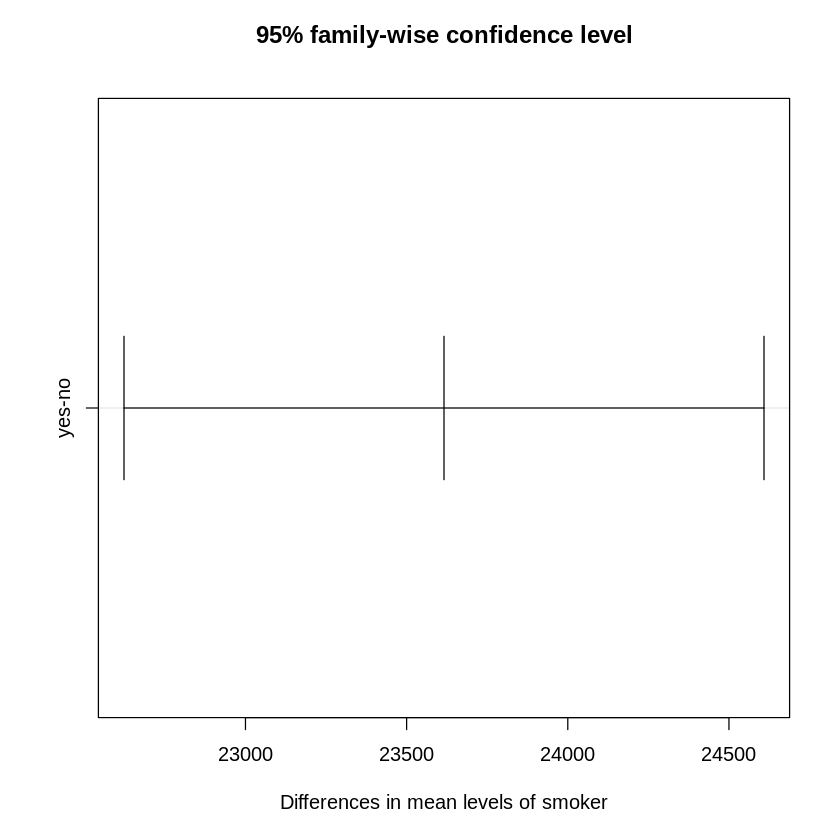

In [54]:
# produce a plot of these confidence intervals
plot(TukeyHSD(processed_aov_smoker, conf.level = 0.95))

In [55]:
# Kiểm định shapiro
# - H0: Biến thặng dư của mô hình phân phối chuẩn
# - H1: Biến thặng dư của mô hình không phân phối
shapiro.test(residuals(processed_aov_smoker))

# Nhìn vào kết quả có p-value < 0.05 nên ta đủ điều kiện bác bỏ H0, vậy thặng dư không tuân theo phân phối chuẩn


	Shapiro-Wilk normality test

data:  residuals(processed_aov_smoker)
W = 0.96084, p-value < 2.2e-16


In [56]:
# install.packages("lmtest")

# Kiểm định Breusch-Pagan
# - H0: phương sai không đổi
# - H1: phương sai thay đổi
library(lmtest)
bptest(processed_aov_smoker)

# Với giá trị p-value < 0.05, ta đủ không đủ điều kiện bác bỏ H0. Vậy phương sai thay đổi


	studentized Breusch-Pagan test

data:  processed_aov_smoker
BP = 199.4, df = 1, p-value < 2.2e-16


### Xem xét nhóm nhân tố children và region

Xem dữ liệu

In [57]:
levels(processed_data$children)

[1] "0" "1" "2" "3" "4" "5"

In [58]:
levels(processed_data$region)

[1] "northeast" "northwest" "southeast" "southwest"

Kiểm tra tính chuẩn

```
H0: Dữ liệu có phân bố chuẩn - homogeneity
H1: Dữ liệu có phân bố không chuẩn - heterogeneity
```

In [59]:
leveneTest(charges ~ children*region, data = processed_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,23,2.187694,0.0009874484
,1314,NA,NA


Nhận xét:
- P-value nhỏ hơn 0.05, do đó ta chưa đủ cơ sở để bác bỏ giả thiết H0, tức là dữ liệu có phân bố không chuẩn.

Do đó, những phân tích sau có thể chưa đủ tin cậy.

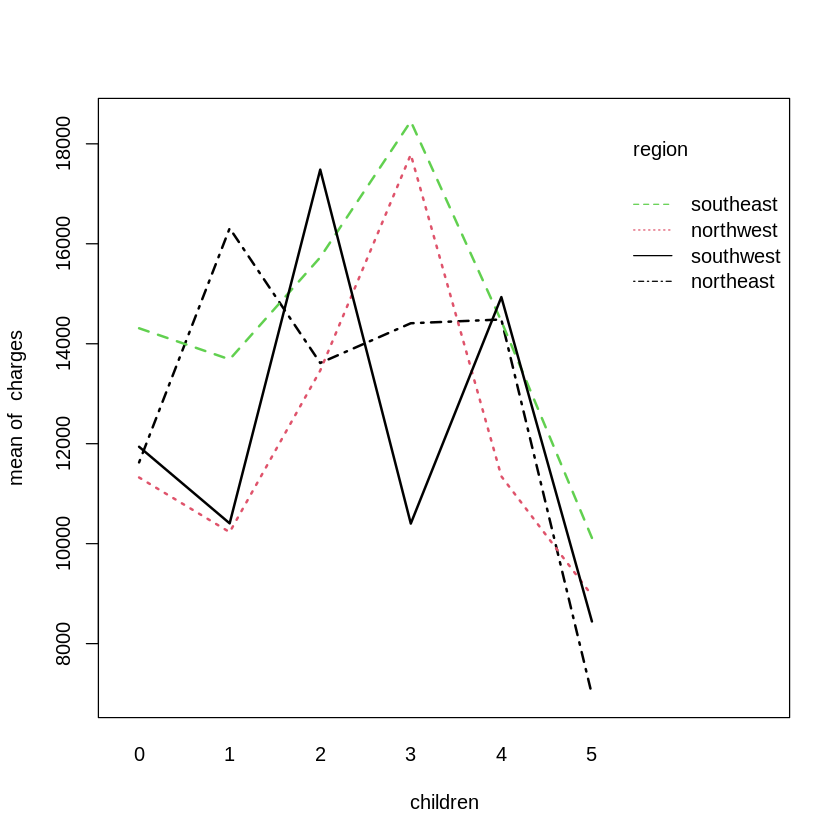

In [60]:
with(processed_data, interaction.plot(children, region, charges, lwd = 2, col = 1:3))

In [61]:
insurance_int   = aov(charges ~ children * region, data = processed_data) # interaction model
insurance_add   = aov(charges ~ children + region, data = processed_data) # additive model
insurance_children  = aov(charges ~ children , data = processed_data)        # single factor model
insurance_region = aov(charges ~ region, data = processed_data)          # single factor model
insurance_null  = aov(charges ~ 1, data = processed_data)              # null model

In [62]:
print(summary(insurance_int))

                  Df    Sum Sq   Mean Sq F value Pr(>F)   
children           5 2.397e+09 479383343   3.340 0.0053 **
region             3 1.453e+09 484180161   3.373 0.0179 * 
children:region   15 3.607e+09 240470590   1.675 0.0498 * 
Residuals       1314 1.886e+11 143544677                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [63]:
summary(aov(charges ~ children * region, data = processed_data))

                  Df    Sum Sq   Mean Sq F value Pr(>F)   
children           5 2.397e+09 479383343   3.340 0.0053 **
region             3 1.453e+09 484180161   3.373 0.0179 * 
children:region   15 3.607e+09 240470590   1.675 0.0498 * 
Residuals       1314 1.886e+11 143544677                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [64]:
final_model <- aov(charges ~ children, data = processed_data)

TukeyHSD(final_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = charges ~ children, data = processed_data)

$children
          diff          lwr      upr     p adj
1-0   365.1962  -2026.08480 2756.477 0.9980122
2-0  2707.5881     62.30881 5352.867 0.0412937
3-0  2989.3428   -110.03004 6088.716 0.0660149
4-0  1484.6807  -5546.17786 8515.539 0.9908612
5-0 -3579.9404 -11817.32899 4657.448 0.8169344
2-1  2342.3919   -588.38208 5273.166 0.2025346
3-1  2624.1465   -722.20151 5970.495 0.2210585
4-1  1119.4845  -6023.68749 8262.656 0.9977503
5-1 -3945.1366 -12278.59355 4388.320 0.7562079
3-2   281.7546  -3250.57080 3814.080 0.9999166
4-2 -1222.9074  -8455.07055 6009.256 0.9967694
5-2 -6287.5285 -14697.39071 2122.334 0.2705133
4-3 -1504.6621  -8914.97868 5905.655 0.9923749
5-3 -6569.2831 -15132.83330 1994.267 0.2433597
5-4 -5064.6211 -15702.34884 5573.107 0.7517252


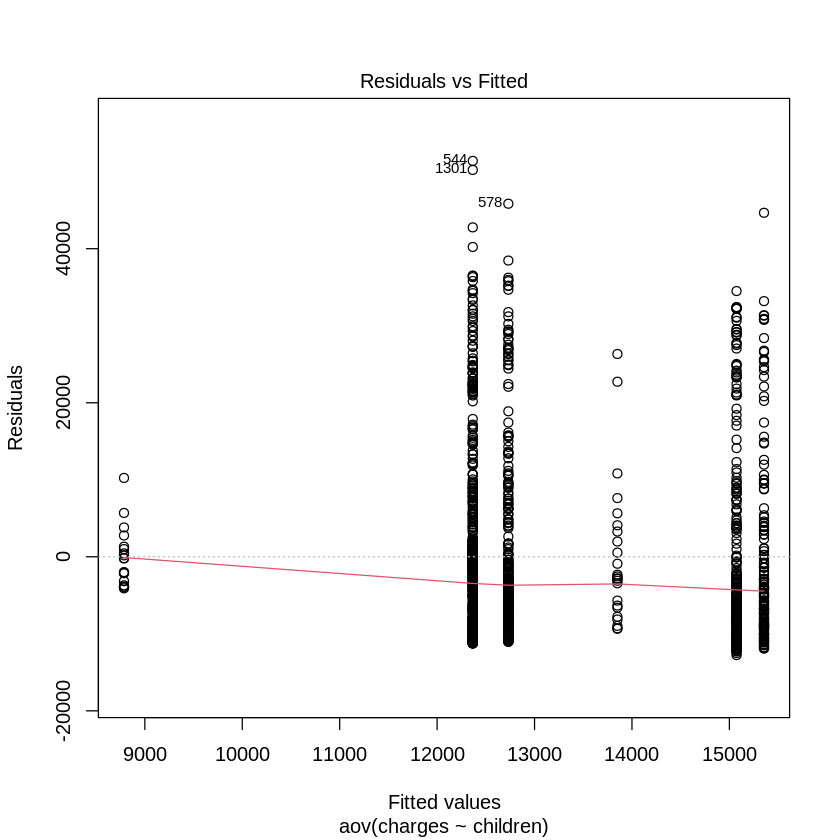

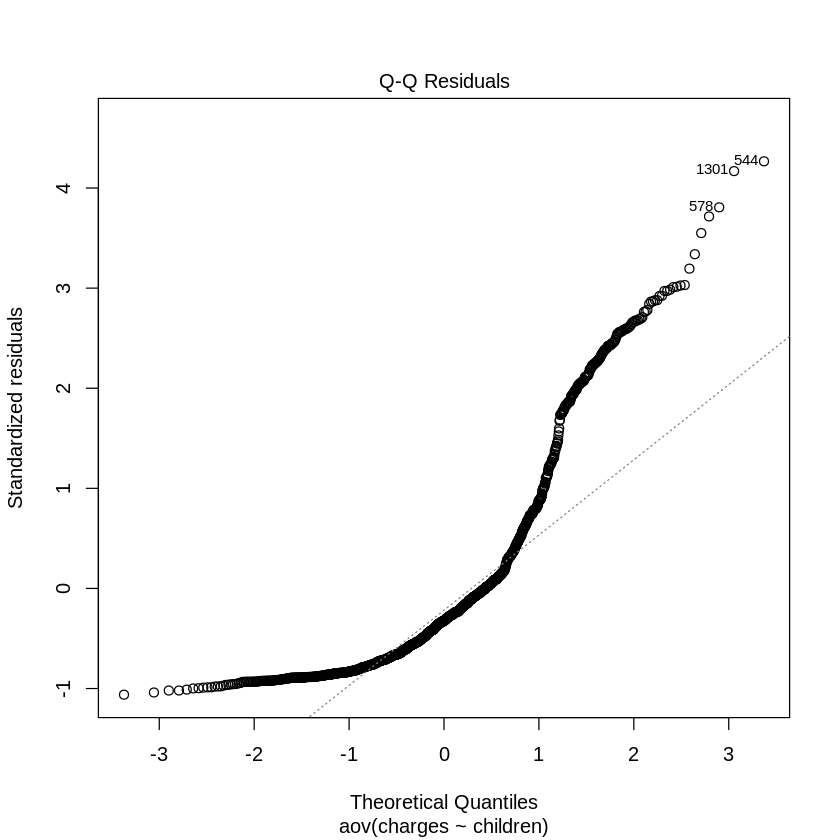

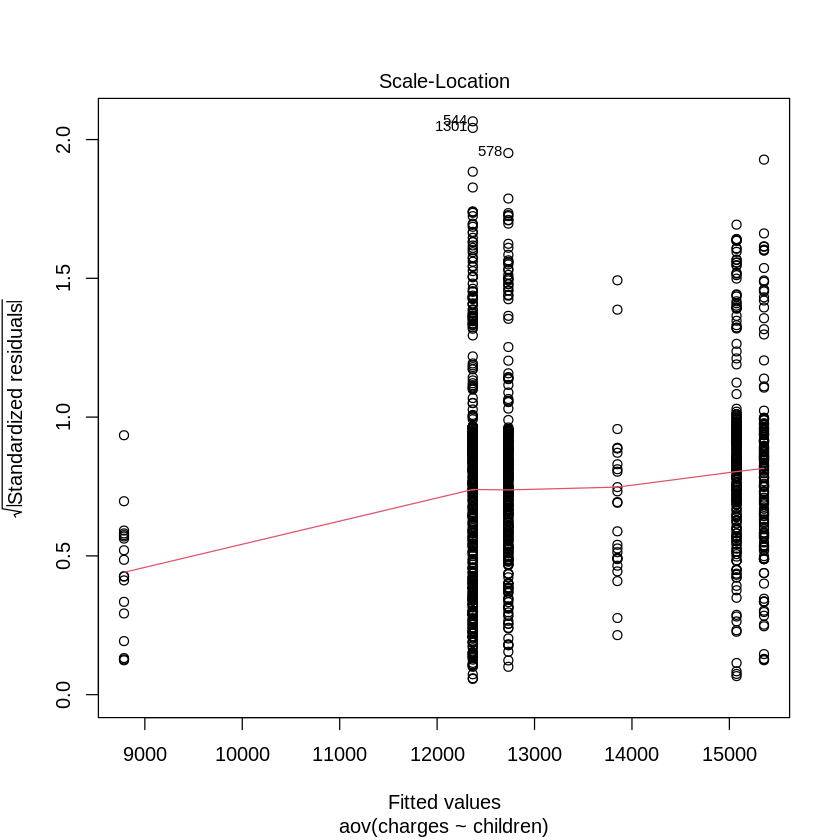

In [65]:
plot(final_model, which = 1:3)

In [66]:
# Kiểm định shapiro
# - H0: Biến thặng dư của mô hình phân phối chuẩn
# - H1: Biến thặng dư của mô hình không phân phối
shapiro.test(residuals(final_model))

# Nhìn vào kết quả có p-value < 0.05 nên ta đủ điều kiện bác bỏ H0, vậy thặng dư không tuân theo phân phối chuẩn


	Shapiro-Wilk normality test

data:  residuals(final_model)
W = 0.81212, p-value < 2.2e-16


In [67]:
#  - H0: phương sai không đổi
#  - H1: phương sai thay đổi
bptest(final_model)

# Với giá trị p-value > 0.05, ta đủ không điều kiện bác bỏ H0. Vậy phương sai không thay đổi


	studentized Breusch-Pagan test

data:  final_model
BP = 7.0394, df = 5, p-value = 0.2177


## Biến đổi dữ liệu

#### Sử dụng log transformation

In [82]:
# Log transformation
processed_data$charges_transformed <- log(processed_data$charges)

# Check the transformed values
head(processed_data)

,age,sex,bmi,children,smoker,region,charges,charges_transformed
,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924,9.734176
2,18,male,33.770,1,no,southeast,1725.552,7.453302
3,28,male,33.000,3,no,southeast,4449.462,8.400538
4,33,male,22.705,0,no,northwest,21984.471,9.998092
5,32,male,28.880,0,no,northwest,3866.855,8.260197
6,31,female,25.740,0,no,southeast,3756.622,8.231275


Kiểm tra tính chuẩn

```
H0: Dữ liệu có phân bố chuẩn - homogeneity
H1: Dữ liệu có phân bố không chuẩn - heterogeneity
```

In [83]:
# P-value nhỏ hơn 0.05, do đó ta đủ cơ sở để bác bỏ giả thiết H0, tức là dữ liệu có phân bố không chuẩn.
leveneTest(charges_transformed ~ sex*smoker, data = processed_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,34.33767,2.234996e-21
,1334,NA,NA


#### Sử dụng Box-Cox transformation

[1] "Optimal lambda: 0.343434343434343"


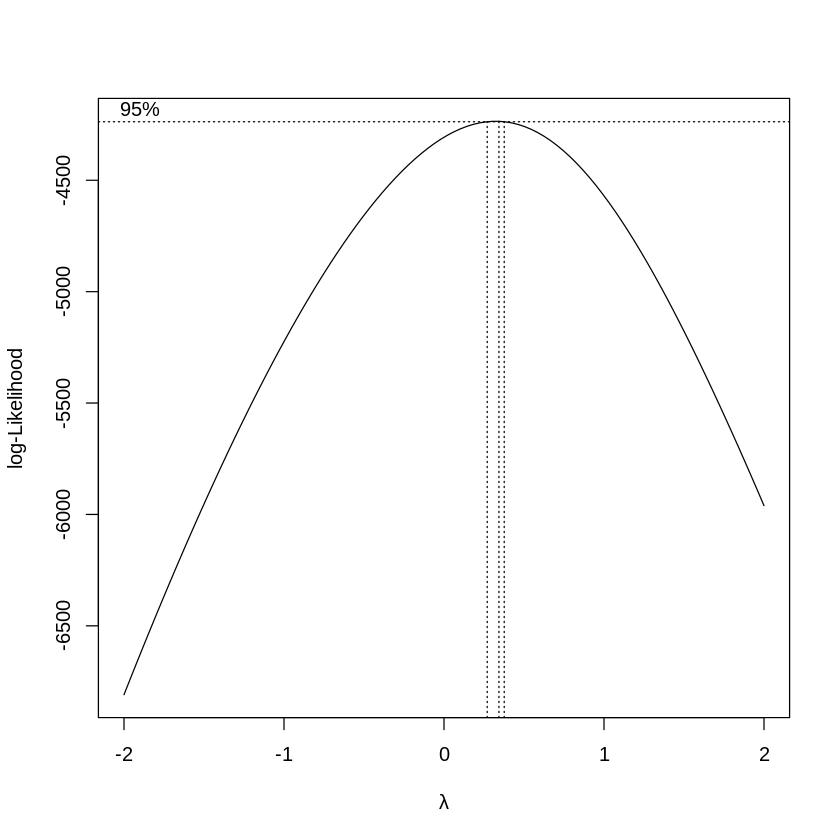

In [84]:
out <- MASS::boxcox(aov(charges ~ sex*smoker, data = processed_data))
lambda_optimal <- out$x[which.max(out$y)]
print(paste("Optimal lambda:", lambda_optimal))

In [85]:
# Apply the Box-Cox transformation
processed_data$charges_transformed <- (processed_data$charges^lambda_optimal - 1) / lambda_optimal

# Check the transformed values
head(processed_data)

,age,sex,bmi,children,smoker,region,charges,charges_transformed
,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924,79.50673
2,18,male,33.770,1,no,southeast,1725.552,34.74375
3,28,male,33.000,3,no,southeast,4449.462,49.22095
4,33,male,22.705,0,no,northwest,21984.471,87.32594
5,32,male,28.880,0,no,northwest,3866.855,46.76785
6,31,female,25.740,0,no,southeast,3756.622,46.27684


In [86]:
# P-value lớn hơn 0.05, do đó ta chưa đủ cơ sở để bác bỏ giả thiết H0, tức là dữ liệu có phân bố chuẩn.
leveneTest(charges_transformed ~ sex*smoker, data = processed_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,2.266491,0.07908455
,1334,NA,NA


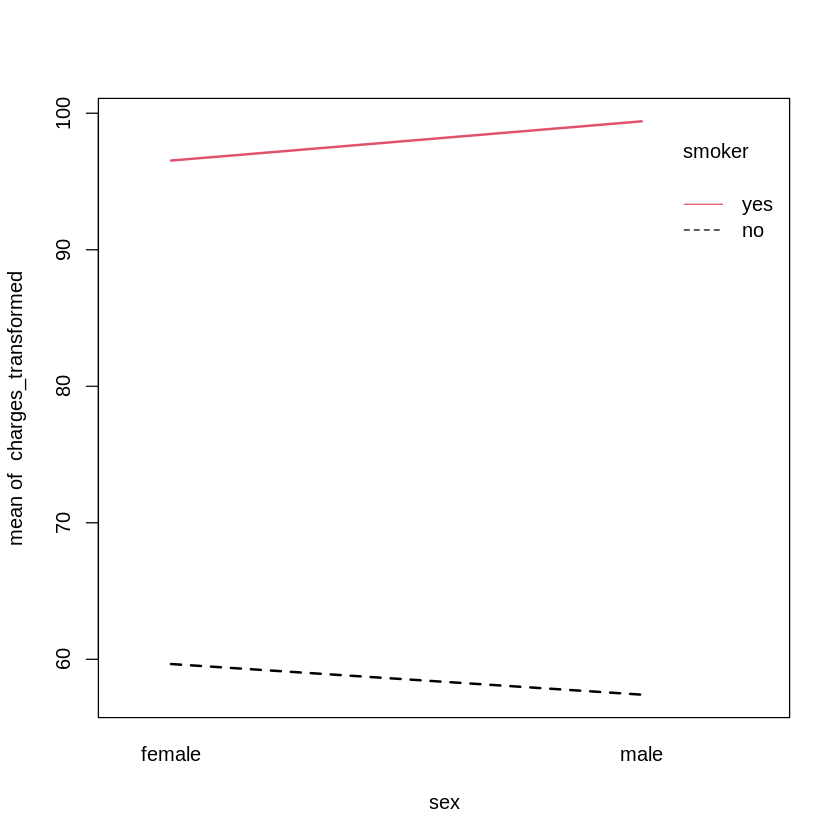

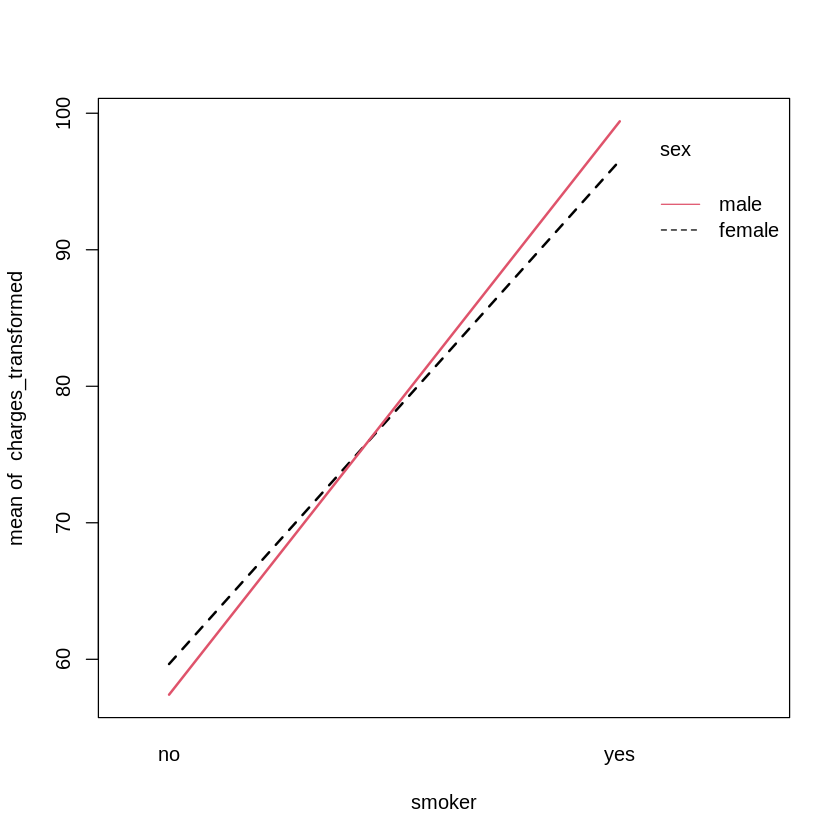

In [87]:
with(processed_data, interaction.plot(sex, smoker, charges_transformed, lwd = 2, col = 1:4))
with(processed_data, interaction.plot(smoker, sex, charges_transformed, lwd = 2, col = 1:3))

In [88]:
insurance_int   = aov(charges_transformed ~ smoker * sex, data = processed_data) # interaction model
insurance_add   = aov(charges_transformed ~ smoker + sex, data = processed_data) # additive model
insurance_smoker  = aov(charges_transformed ~ smoker , data = processed_data)        # single factor model
insurance_sex = aov(charges_transformed ~ sex, data = processed_data)          # single factor model
insurance_null  = aov(charges_transformed ~ 1, data = processed_data)              # null model

In [89]:
print(summary(insurance_int))

              Df Sum Sq Mean Sq  F value Pr(>F)    
smoker         1 342337  342337 1570.001 <2e-16 ***
sex            1    493     493    2.260 0.1330    
smoker:sex     1   1396    1396    6.402 0.0115 *  
Residuals   1334 290877     218                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Dòng sex:smoker

```
H0: Tất cả các delta_j = 0 (tức là không có tương tác)
H1: Không phải tắt cả delta_j = 0 (tức là có tương tác)
```

Ta thấy p-value = 0.0115 < 0.05, ta đủ cơ sở để bác bỏ H0, tức là không phải tất cả delta_j = 0, vậy có tương tác giữa hai biến đang xem xét.

In [90]:
insurance_table = expand.grid(sex = unique(processed_data$sex), smoker = unique(processed_data$smoker))
insurance_table

sex,smoker
<fct>,<fct>
female,yes
male,yes
female,no
male,no


In [91]:
matrix(paste0(insurance_table$sex, "-", insurance_table$smoker), 2, 2, byrow = TRUE)

female-yes,male-yes
female-no,male-no


In [92]:
matrix(paste0(insurance_table$sex, "-", insurance_table$smoker) , 2, 2, byrow = TRUE)

female-yes,male-yes
female-no,male-no


In [93]:
get_est_means = function(model, table) {
  mat = matrix(predict(model, table), nrow = 2, ncol = 2, byrow = TRUE)
  colnames(mat) = c("Female", "Male")
  rownames(mat) = c("Yes", "No")
  mat
}

In [94]:
knitr::kable(get_est_means(model = insurance_int, table = insurance_table))



|    |   Female|     Male|
|:---|--------:|--------:|
|Yes | 96.53446| 99.40640|
|No  | 59.65364| 57.40969|

In [95]:
knitr::kable(get_est_means(model = insurance_add, table = insurance_table))



|    |   Female|     Male|
|:---|--------:|--------:|
|Yes | 98.90738| 97.69013|
|No  | 59.15477| 57.93752|

In [96]:
additive_means = get_est_means(model = insurance_add, table = insurance_table)
additive_means["Yes",] - additive_means["No",]

Female     Male 
39.75261 39.75261

In [97]:
additive_means = get_est_means(model = insurance_int, table = insurance_table)
additive_means["Yes",] - additive_means["No",]

Female     Male 
36.88081 41.99670

In [98]:
knitr::kable(get_est_means(model = insurance_sex, table = insurance_table))



|    |   Female|     Male|
|:---|--------:|--------:|
|Yes | 66.06043| 67.28762|
|No  | 66.06043| 67.28762|

In [99]:
knitr::kable(get_est_means(model = insurance_smoker, table = insurance_table))



|    |   Female|     Male|
|:---|--------:|--------:|
|Yes | 98.20102| 98.20102|
|No  | 58.56330| 58.56330|

In [100]:
knitr::kable(get_est_means(model = insurance_null, table = insurance_table))



|    |   Female|     Male|
|:---|--------:|--------:|
|Yes | 66.68044| 66.68044|
|No  | 66.68044| 66.68044|

In [101]:
processed_aov = aov(charges_transformed ~ sex * smoker, data = processed_data)
summary(processed_aov)

              Df Sum Sq Mean Sq  F value Pr(>F)    
sex            1    504     504    2.310 0.1288    
smoker         1 342326  342326 1569.950 <2e-16 ***
sex:smoker     1   1396    1396    6.402 0.0115 *  
Residuals   1334 290877     218                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [102]:
##Tukey’s Honest Significance difference
TukeyHSD(processed_aov, conf.level = 0.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = charges_transformed ~ sex * smoker, data = processed_data)

$sex
                diff        lwr      upr     p adj
male-female 1.227185 -0.3567773 2.811147 0.1287797

$smoker
           diff      lwr      upr p adj
yes-no 39.52188 37.55942 41.48434     0

$`sex:smoker`
                          diff       lwr         upr     p adj
male:no-female:no    -2.243950 -4.573787  0.08588751 0.0639253
female:yes-female:no 36.880815 32.984266 40.77736354 0.0000000
male:yes-female:no   39.752752 36.330564 43.17493965 0.0000000
female:yes-male:no   39.124765 35.208626 43.04090307 0.0000000
male:yes-male:no     41.996702 38.552225 45.44117808 0.0000000
male:yes-female:yes   2.871937 -1.777726  7.52160040 0.3853357


Nhận xét:
- Giả thuyết:
    - H0: Các giá trị trung bình bằng nhau
    - H1: Các giá trị trung bình không bằng nhau
- Nhìn vào kết quả ta có: p-value-adj có giá trị là 0.00 < 0.05 nên ta không đủ điều kiện bác bỏ H0. Nghĩa là giá trị trung bình của chi phí y tế của
  - Nữ hút - Nữ không
  - Nam hút - Nữ không
  - Nữ hút - Nam không
  - Nam hút - Nam không

Khác nhau

In [104]:
# Kiểm định shapiro
# - H0: Biến thặng dư của mô hình phân phối chuẩn
# - H1: Biến thặng dư của mô hình không phân phối
shapiro.test(residuals(processed_aov))

# Nhìn vào kết quả có p-value < 0.05 nên ta đủ điều kiện bác bỏ H0, vậy thặng dư không tuân theo phân phối chuẩn


	Shapiro-Wilk normality test

data:  residuals(processed_aov)
W = 0.97828, p-value = 2.557e-13


In [105]:
#  - H0: phương sai không đổi
#  - H1: phương sai thay đổi
bptest(processed_aov)

# Với giá trị p-value > 0.05, ta đủ không điều kiện bác bỏ H0. Vậy phương sai không thay đổi


	studentized Breusch-Pagan test

data:  processed_aov
BP = 12.147, df = 3, p-value = 0.006897
